<a href="https://colab.research.google.com/github/mightfury/Heart-Disease-Prediction/blob/main/Exp_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heart Disease Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Predicting Heart Disease using Machine Learning
This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of heart disease classification.

It is intended to be an end-to-end example of what a data science and machine learning proof of concept might look like.

# What is classification?
Classification involves deciding whether a sample is part of one class or another (single-class classification). If there are multiple class options, it's referred to as multi-class classification.

# What we'll end up with
Since we already have a dataset, we'll approach the problem with the following machine learning modelling framework.
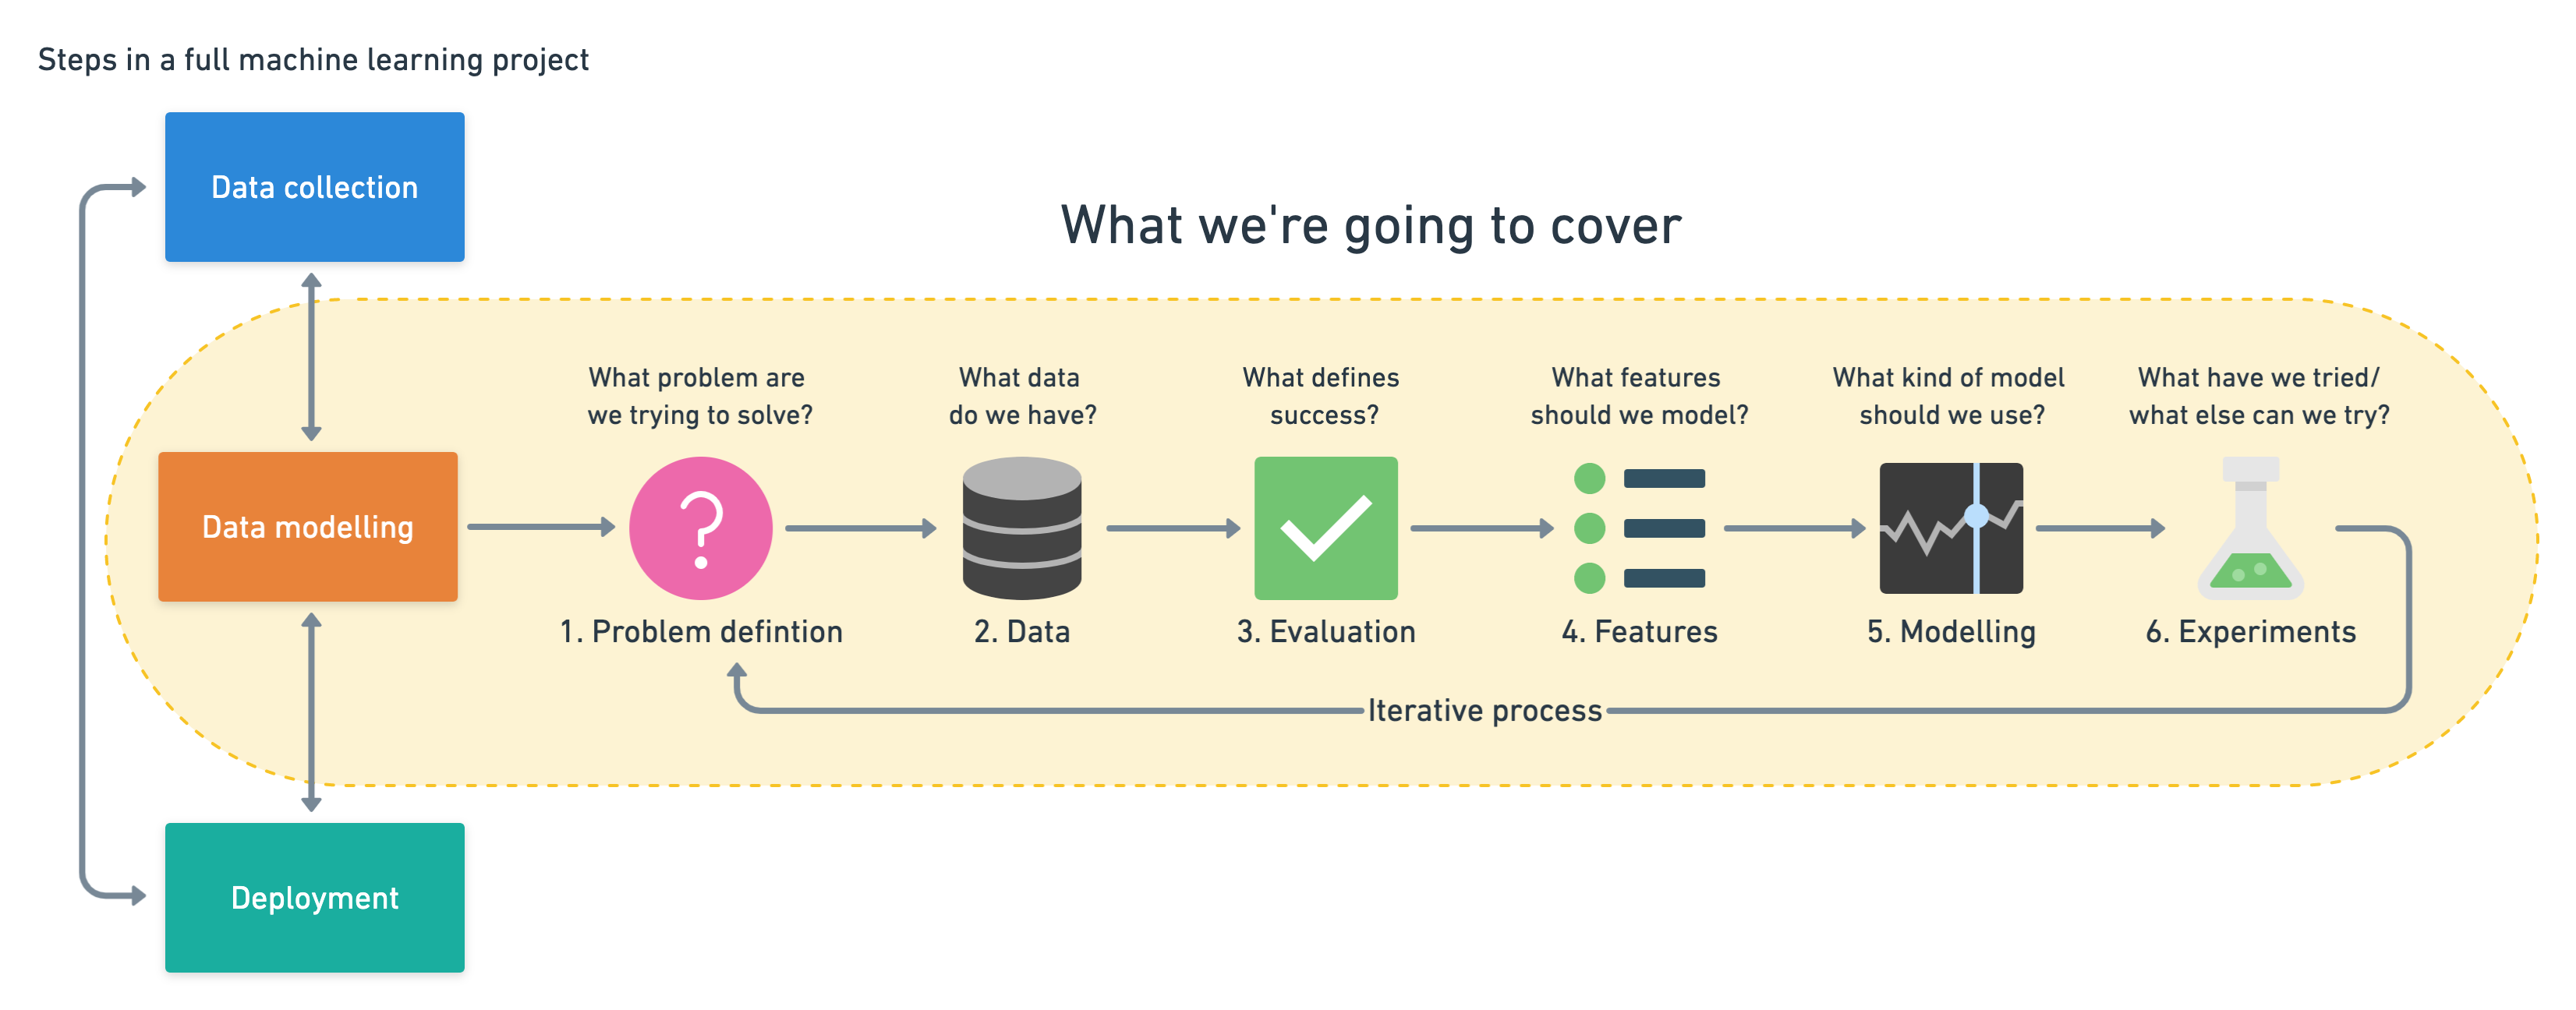
More specifically, we'll look at the following topics.

Exploratory data analysis (EDA) - the process of going through a dataset and finding out more about it.

Model training - create model(s) to learn to predict a target variable based on other variables.

Model evaluation - evaluating a models predictions using problem-specific evaluation metrics.

Model comparison - comparing several different models to find the best one.

Model fine-tuning - once we've found a good model, how can we improve it?

Feature importance - since we're predicting the presence of heart disease, are there some things which are more important for prediction?

Cross-validation - if we do build a good model, can we be sure it will work on unseen data?

Reporting what we've found - if we had to present our work, what would we show someone? To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.

Tools which can be used for each step of the machine learning modelling process. We'll work through each step and by the end of the notebook, we'll have a handful of models, all which can predict whether or not a person has heart disease based on a number of different parameters at a considerable accuracy.

You'll also be able to describe which parameters are more indicative than others, for example, sex may be more important than age.

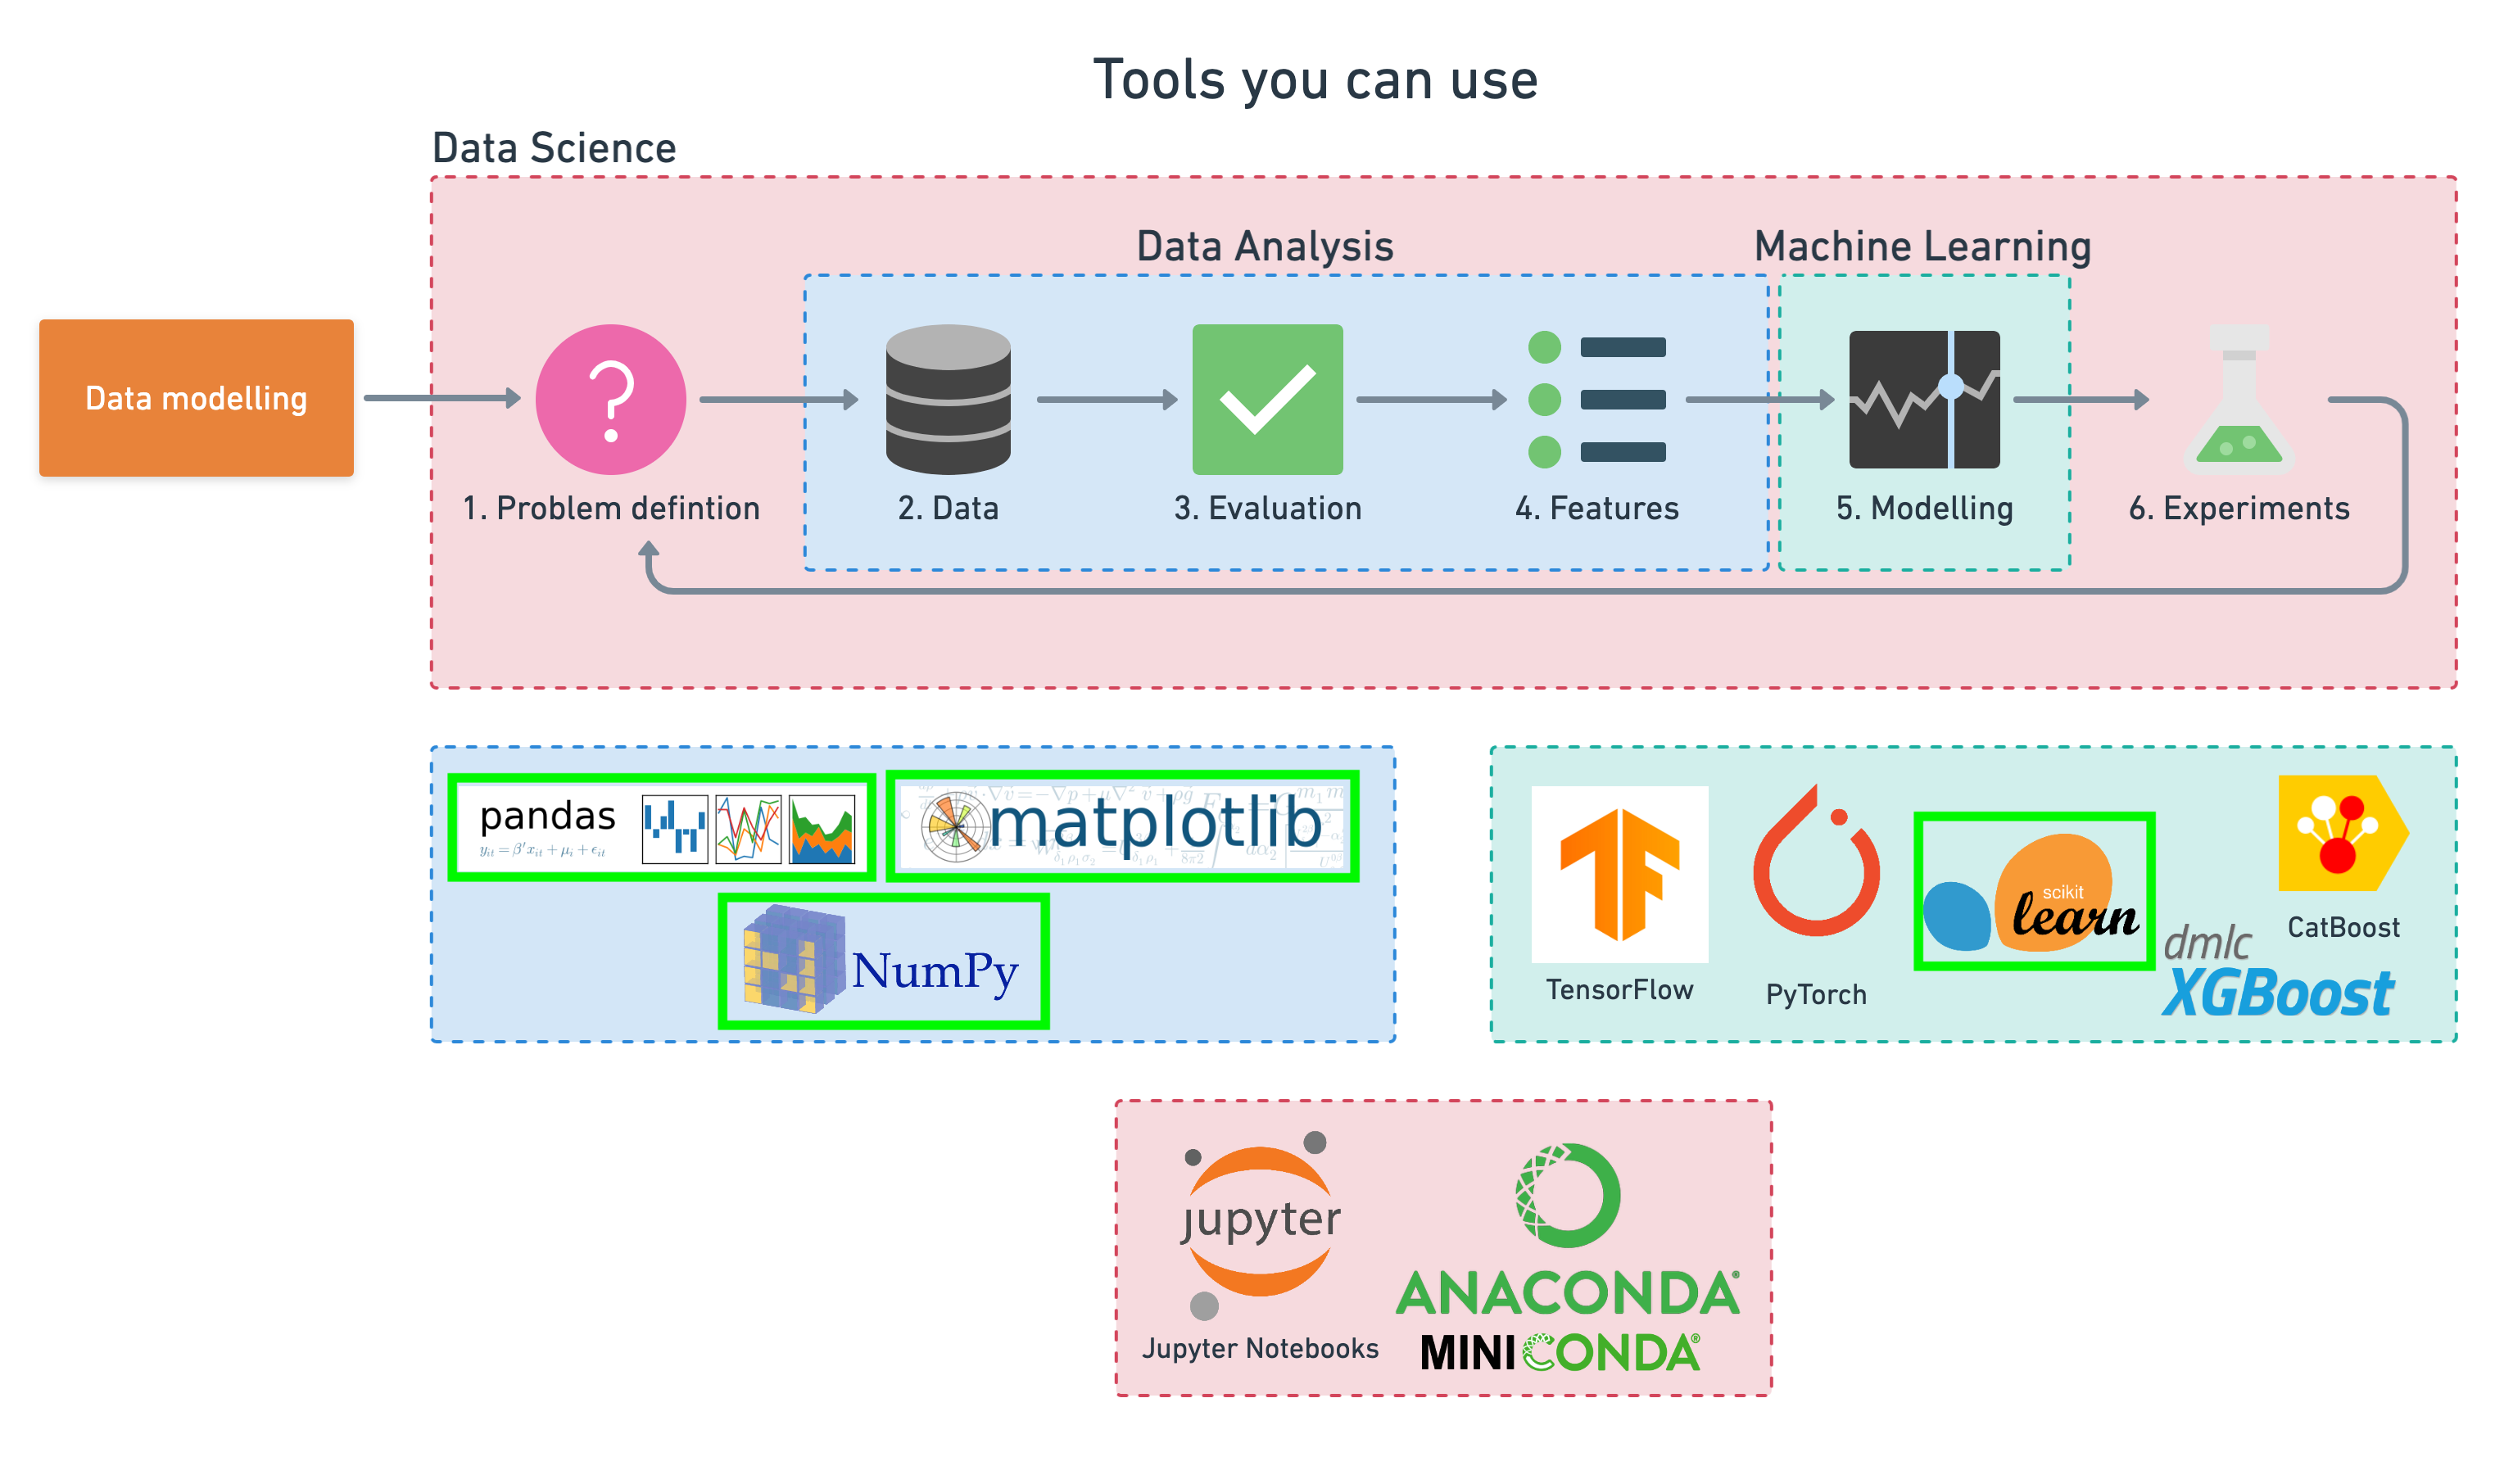

We are going to predict whether or not a person has heart disease based on a number of different parameters at a considerable accuracy.

You'll also be able to describe which parameters are more indicative than others, for example, sex may be more important than age.

1. **Problem Definition**
In our case, the problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we're going to be using a number of differnet features (pieces of information) about a person to predict whether they have heart disease or not.

In a statement,

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

2. **Data**
What you'll want to do here is dive into the data your problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it and finding out what you should expect.

The original data came from the Cleveland database from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from Kaggle.

The original database contains 76 attributes, but here only 14 attributes will be used. Attributes (also called features) are the variables what we'll use to predict our target variable.

Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable.

We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.

3. **Evaluation**
The evaluation metric is something you might define at the start of a project.

Since machine learning is very experimental, you might say something like,

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

4. **Features**
Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a data dictionary.

Heart Disease Data Dictionary A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1.age - age in years

2.sex - (1 = male; 0 = female)

3.cp - chest pain type

0: Typical angina: chest pain related decrease blood supply to the heart 1: Atypical angina: chest pain not related to heart 2: Non-anginal pain: typically esophageal spasms (non heart related) 3: Asymptomatic: chest pain not showing signs of disease

4.trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

5.**chol** - serum cholestoral in mg/dl

serum = LDL + HDL + .2 * triglycerides

above 200 is cause for concern

6.**fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) '>126' mg/dL signals diabetes

7.**restecg** - resting electrocardiographic results

0: Nothing to note 1: ST-T Wave abnormalitycan range from mild symptoms to severe problems signals non-normal heart beat2: Possible or definite left ventricular hypertrophy Enlarged heart's main pumping chamber

8.**thalach** - maximum heart rate achieved

9.**exang** - exercise induced angina (1 = yes; 0 = no)

10.**oldpeak** - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

11.**slope** - the slope of the peak exercise ST segment 0: Upsloping: better heart rate with excercise (uncommon) 1: Flatsloping: minimal change (typical healthy heart) 2: Downslopins: signs of unhealthy heart ca - number of major vessels (0-3) colored by flourosopy colored vessel means the doctor can see the blood passing through the more blood movement the better (no clots)

12.**thal** - thalium stress result 1,3: normal 6: fixed defect: used to be defect but ok now 7: reversable defect: no proper blood movement when excercising

13.**target** - have disease or not (1=yes, 0=no) (= the predicted attribute) Note: No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

**Preparing the tools**
At the start of any project, it's custom to see the required libraries imported in a big chunk like you can see below.

However, in practice, your projects may import libraries as you go. After you've spent a couple of hours working on your problem, you'll probably want to do some tidying up. This is where you may want to consolidate every library you've used at the top of your notebook (like the cell below).

The libraries you use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project.

**pandas** for data analysis.

**NumPy** for numerical operations.

**Matplotlib/seaborn** for plotting or data visualization.

**Scikit-Learn** for machine learning modelling and evaluation.



In [ ]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Load Data
There are many different kinds of ways to store data. The typical way of storing tabular data, data similar to what you'd see in an Excel file is in .csv format. .csv stands for comma seperated values.

Pandas has a built-in function to read .csv files called read_csv() which takes the file pathname of your .csv file. You'll likely use this a lot

In [ ]:
df = pd.read_csv("/content/heart-disease.csv") # 'DataFrame' shortened to 'df'
df.shape # (rows, columns)

(303, 14)

# Data Exploration (exploratory data analysis or EDA)


Once you've imported a dataset, the next step is to explore. There's no set way of doing this. But what you should be trying to do is become more and more familiar with the dataset.

Compare different columns to each other, compare them to the target variable. Refer back to your data dictionary and remind yourself of what different columns mean.

Your goal is to become a subject matter expert on the dataset you're working with. So if someone asks you a question about it, you can give them an explanation and when you start building models, you can sound check them to make sure they're not performing too well (overfitting) or why they might be performing poorly (underfitting).

Since EDA has no real set methodolgy, the following is a short check list you might want to walk through:

  1.What question(s) are you trying to solve (or prove wrong)?

  2.What kind of data do you have and how do you treat different types?

  3.What’s missing from the data and how do you deal with it?

  4.Where are the outliers and why should you care about them?

  5.How can you add, change or remove features to get more out of your data?

Once of the quickest and easiest ways to check your data is with the head() function. Calling it on any dataframe will print the top 5 rows, tail() calls the bottom 5. You can also pass a number to them like head(10) to show the top 10 rows.

In [ ]:
# Let's check the top 5 rows of our dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# And the top 10
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


**value_counts()** allows you to show how many times each of the values of a categorical column appear.

In [ ]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Since these two values are close to even, our target column can be considered **balanced**. An **unbalanced** target column, meaning some classes have far more samples, can be harder to model than a balanced set. Ideally, all of your target classes have the same number of samples.

If you'd prefer these values in percentages, value_counts() takes a parameter, normalize which can be set to true.

In [ ]:
# Normalized value counts
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

We can plot the target column value counts by calling the plot() function and telling it what kind of plot we'd like, in this case, bar is good.

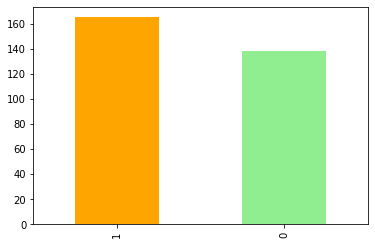

In [ ]:
# Plot the value counts with a bar graph
df.target.value_counts().plot(kind="bar", color=["orange", "lightgreen"]);

**df.info()** shows a quick insight to the number of missing values you have and what type of data your working with.

In our case, there are no missing values and all of our columns are numerical in nature.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Another way to get some quick insights on your dataframe is to use df.describe(). describe() shows a range of different metrics about your numerical columns such as mean, max and standard deviation.

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Heart Disease Frequency according to Gender
If you want to compare two columns to each other, you can use the function pd.crosstab(column_1, column_2).

This is helpful if you want to start gaining an intuition about how your independent variables interact with your dependent variables.

Let's compare our target column with the sex column.

Remember from our data dictionary, for the target column, 1 = heart disease present, 0 = no heart disease. And for sex, 1 = male, 0 = female.

In [ ]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

There are 207 males and 96 females in our study.

In [ ]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


There are 24 females and 114 males not having possibility of heart disease and 27 females and 93 males have possibility of heart disease